# <b> Análise de Dados - Gestão de Relacionamento com o Cliente 

### <b> Knowledge Discovery and Data Mining (KDD)

## <b> Import das bibliotecas

In [1]:
##############
# Bibliotecas 
##############
import numpy as np
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt

##################
# Machine Learning
##################
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
# Importando o Classificadores
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression 
# Importando métricas de avaliação do SKLearn
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import svm


# comando que imprime todas as linhas 
pd.set_option('display.max_rows', None)
# comando que imprime todas as colunas
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

## <b> Carregando os dados

In [2]:
# Carregando os dados
data_train = pd.read_csv('orange_small_train.data',  sep = '\t')
data_test = pd.read_csv('orange_small_test.data',  sep = '\t')
up_label = pd.read_csv('train_upselling.labels',  sep = '\t')
churn_label = pd.read_csv('train_churn.labels',  sep = '\t')
appetency_label = pd.read_csv('train_appetency.labels',  sep = '\t')

## <b> Visualizando informações sobre os dados

In [3]:
# Visualizando os dados de treino em seu estado natural
data_train.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,Var11,Var12,Var13,Var14,Var15,Var16,Var17,Var18,Var19,Var20,Var21,Var22,Var23,Var24,Var25,Var26,Var27,Var28,Var29,Var30,Var31,Var32,Var33,Var34,Var35,Var36,Var37,Var38,Var39,Var40,Var41,Var42,Var43,Var44,Var45,Var46,Var47,Var48,Var49,Var50,Var51,Var52,Var53,Var54,Var55,Var56,Var57,Var58,Var59,Var60,Var61,Var62,Var63,Var64,Var65,Var66,Var67,Var68,Var69,Var70,Var71,Var72,Var73,Var74,Var75,Var76,Var77,Var78,Var79,Var80,Var81,Var82,Var83,Var84,Var85,Var86,Var87,Var88,Var89,Var90,Var91,Var92,Var93,Var94,Var95,Var96,Var97,Var98,Var99,Var100,Var101,Var102,Var103,Var104,Var105,Var106,Var107,Var108,Var109,Var110,Var111,Var112,Var113,Var114,Var115,Var116,Var117,Var118,Var119,Var120,Var121,Var122,Var123,Var124,Var125,Var126,Var127,Var128,Var129,Var130,Var131,Var132,Var133,Var134,Var135,Var136,Var137,Var138,Var139,Var140,Var141,Var142,Var143,Var144,Var145,Var146,Var147,Var148,Var149,Var150,Var151,Var152,Var153,Var154,Var155,Var156,Var157,Var158,Var159,Var160,Var161,Var162,Var163,Var164,Var165,Var166,Var167,Var168,Var169,Var170,Var171,Var172,Var173,Var174,Var175,Var176,Var177,Var178,Var179,Var180,Var181,Var182,Var183,Var184,Var185,Var186,Var187,Var188,Var189,Var190,Var191,Var192,Var193,Var194,Var195,Var196,Var197,Var198,Var199,Var200,Var201,Var202,Var203,Var204,Var205,Var206,Var207,Var208,Var209,Var210,Var211,Var212,Var213,Var214,Var215,Var216,Var217,Var218,Var219,Var220,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,NaN,NaN,NaN,NaN,NaN,1526.0,7.0,NaN,NaN,NaN,NaN,NaN,184.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,464.0,580.0,NaN,14.0,128.0,NaN,NaN,166.56,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,3570.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.076907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,35.0,NaN,1350864.0,NaN,0.0,NaN,NaN,7333.11,NaN,5.0,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.0,NaN,NaN,168.0,117625.60,NaN,NaN,NaN,NaN,NaN,1175.0,NaN,NaN,NaN,6.0,NaN,720.0,8.0,NaN,NaN,NaN,NaN,NaN,0.0,1212385.0,69134.0,NaN,NaN,NaN,NaN,NaN,185.0,NaN,NaN,0.0,9.0,NaN,NaN,NaN,NaN,397579.0,NaN,NaN,NaN,1812252.0,NaN,NaN,NaN,NaN,NaN,NaN,142.0,NaN,NaN,38418.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,462.0,NaN,NaN,bZkvyxLkBI,RO12,NaN,taul,1K8T,lK27,ka_ns41,nQUveAzAF7,NaN,NaN,dXGu,9_Y1,FbIm,VpdQ,haYg,me75fM6ugJ,kIsH,NaN,uKAI,L84s,XfqtO3UdzaXh_,NaN,NaN,NaN,XTbPUYD,sH5Z,cJvF,FzaX,1YVfGrO,oslk,fXVEsaq,jySVZNlOJy,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,525.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168.0,210.0,NaN,2.0,24.0,NaN,NaN,353.52,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,4764966.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.408032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,26,0.0,NaN,2872928.0,NaN,3.0,NaN,NaN,151098.90,NaN,25.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58158.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,NaN,NaN,40.0,-356411.60,NaN,NaN,NaN,NaN,NaN,590.0,NaN,NaN,NaN,72.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0,4136430.0,357038.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,9.0,NaN,NaN,NaN,NaN,278334.0,NaN,NaN,NaN,10439160.0,NaN,NaN,NaN,NaN,NaN,NaN,32.0,NaN,NaN,238572.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CEat0G8rTN,RO12,NaN,taul,1K8T,2Ix5,qEdASpP,y2LIM01bE1,NaN,NaN,lg1t,9_Y1,k13i,sJzTlal,zm5i,me75fM6ugJ,kIsH,NaN,uKAI,L84s,NhsEn4L,NaN,NaN,NaN,kZJyVg2,NaN,NaN,FzaX,0AJo2f2,oslk,2Kb5FSF,LM8l689qOp,NaN,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,5236.0,7.0,NaN,NaN,NaN,NaN,NaN,904.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1212.0,1515.0,NaN,26.0,816.0,NaN,NaN,220.08,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,5883894.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.599658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130,518.0,NaN,1675

In [4]:
# Visualizando os dados de teste me seu estado natural
data_test.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,Var11,Var12,Var13,Var14,Var15,Var16,Var17,Var18,Var19,Var20,Var21,Var22,Var23,Var24,Var25,Var26,Var27,Var28,Var29,Var30,Var31,Var32,Var33,Var34,Var35,Var36,Var37,Var38,Var39,Var40,Var41,Var42,Var43,Var44,Var45,Var46,Var47,Var48,Var49,Var50,Var51,Var52,Var53,Var54,Var55,Var56,Var57,Var58,Var59,Var60,Var61,Var62,Var63,Var64,Var65,Var66,Var67,Var68,Var69,Var70,Var71,Var72,Var73,Var74,Var75,Var76,Var77,Var78,Var79,Var80,Var81,Var82,Var83,Var84,Var85,Var86,Var87,Var88,Var89,Var90,Var91,Var92,Var93,Var94,Var95,Var96,Var97,Var98,Var99,Var100,Var101,Var102,Var103,Var104,Var105,Var106,Var107,Var108,Var109,Var110,Var111,Var112,Var113,Var114,Var115,Var116,Var117,Var118,Var119,Var120,Var121,Var122,Var123,Var124,Var125,Var126,Var127,Var128,Var129,Var130,Var131,Var132,Var133,Var134,Var135,Var136,Var137,Var138,Var139,Var140,Var141,Var142,Var143,Var144,Var145,Var146,Var147,Var148,Var149,Var150,Var151,Var152,Var153,Var154,Var155,Var156,Var157,Var158,Var159,Var160,Var161,Var162,Var163,Var164,Var165,Var166,Var167,Var168,Var169,Var170,Var171,Var172,Var173,Var174,Var175,Var176,Var177,Var178,Var179,Var180,Var181,Var182,Var183,Var184,Var185,Var186,Var187,Var188,Var189,Var190,Var191,Var192,Var193,Var194,Var195,Var196,Var197,Var198,Var199,Var200,Var201,Var202,Var203,Var204,Var205,Var206,Var207,Var208,Var209,Var210,Var211,Var212,Var213,Var214,Var215,Var216,Var217,Var218,Var219,Var220,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,NaN,NaN,NaN,NaN,NaN,1225.0,7.0,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,156.0,195.0,NaN,0.0,72.0,NaN,NaN,166.56,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,4259232.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.565264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106,7.0,NaN,959480.0,NaN,0.0,NaN,NaN,70399.20,NaN,15.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,NaN,NaN,40.0,383386.4,NaN,NaN,NaN,NaN,NaN,620.0,NaN,NaN,NaN,54.0,NaN,20646.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,756720.0,1123876.0,NaN,NaN,NaN,NaN,NaN,1915.0,NaN,NaN,0.0,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,8335680.0,NaN,NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,1689774.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,xddq9ayfAo,RO12,NaN,taul,1K8T,PShj,iJzviRg,17VONbZnAuZ90atz,MF5EBmj,NaN,WVvO,9_Y1,vm5R,VpdQ,haYg,7M47J5GA0pTYIFxg5uy,kIsH,NaN,uKAI,L84s,H4p93_uThXwSG,NaN,XREFJCi,NaN,7WwzJJY,OgPm,cJvF,FzaX,ch2oGfM,Al6ZaUT,P6pu4Vl,LM8l689qOp,NaN,ELof,7P5s,ZI9m,R4y5gQQWY8OodqDV,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,259.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.0,240.0,NaN,0.0,40.0,NaN,NaN,300.32,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,4859550.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.464003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,16,0.0,NaN,2413880.0,NaN,3.0,NaN,NaN,145373.70,NaN,20.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,481320.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,NaN,NaN,32.0,143287.6,NaN,NaN,NaN,NaN,NaN,590.0,NaN,NaN,NaN,72.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,16.0,4322755.0,445056.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,10646080.0,NaN,NaN,NaN,NaN,NaN,NaN,36.0,NaN,NaN,1038444.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cFHt0GoOh3,RO12,NaN,taul,1K8T,lK27,rsmctTK,7ONkRNQCK7,NaN,NaN,aFB2,9_Y1,t_4G,VpdQ,zm5i,me75fM6ugJ,kIsH,NaN,uKAI,L84s,NhsEn4L,NaN,NaN,NaN,kZJyVg2,4ls8,cJvF,FzaX,Kgofc8E,oslk,S46Rt72,LM8l689qOp,NaN,NaN,Qu4f,RAYp,F2FyR07IdsN7I,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,861.0,14.0,NaN,NaN,NaN,NaN,NaN,236.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,40.0,NaN,0.0,8.0,NaN,NaN,186.64,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,10038840.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.737663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,

In [5]:
# visualizando a quantidade de linhas e colunas
print("Teste = ", data_test.shape)
print("Treino = ", data_train.shape)
print("Variáveis Target = ", up_label.shape, churn_label.shape, appetency_label.shape)

Teste =  (50000, 230)
Treino =  (50000, 230)
Variáveis Target =  (49999, 1) (49999, 1) (49999, 1)


In [7]:
# Informações sobre o data set test
print(data_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 230 entries, Var1 to Var230
dtypes: float64(191), int64(1), object(38)
memory usage: 87.7+ MB
None


In [8]:
# Informações sobre o data set train
print(data_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 230 entries, Var1 to Var230
dtypes: float64(191), int64(1), object(38)
memory usage: 87.7+ MB
None


## <b> Tratamento os dados das colunas

### <b> Separação do dataset Train (em numérico e object)

In [9]:
# Seleciona os nomes das colunas (train)
colunas = list(data_train.columns)

# Separa o conjunto de dados train em dois novos conjuntos um de numéricos e outro object
obj_train = [x for x in colunas if data_train[x].dtype == 'O'] 
num_train = [x for x in colunas if data_train[x].dtype != 'O'] 

In [10]:
# Exclui as numéricas e cria um novo dataset com valores object
data_obj_train = data_train.drop(num_train, axis=1)

In [11]:
# Visualizando as primeiras linhas do dataset de valores object
data_obj_train.head()

,Var191,Var192,Var193,Var194,Var195,Var196,Var197,Var198,Var199,Var200,Var201,Var202,Var203,Var204,Var205,Var206,Var207,Var208,Var210,Var211,Var212,Var213,Var214,Var215,Var216,Var217,Var218,Var219,Var220,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229
0,NaN,bZkvyxLkBI,RO12,NaN,taul,1K8T,lK27,ka_ns41,nQUveAzAF7,NaN,NaN,dXGu,9_Y1,FbIm,VpdQ,haYg,me75fM6ugJ,kIsH,uKAI,L84s,XfqtO3UdzaXh_,NaN,NaN,NaN,XTbPUYD,sH5Z,cJvF,FzaX,1YVfGrO,oslk,fXVEsaq,jySVZNlOJy,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN
1,NaN,CEat0G8rTN,RO12,NaN,taul,1K8T,2Ix5,qEdASpP,y2LIM01bE1,NaN,NaN,lg1t,9_Y1,k13i,sJzTlal,zm5i,me75fM6ugJ,kIsH,uKAI,L84s,NhsEn4L,NaN,NaN,NaN,kZJyVg2,NaN,NaN,FzaX,0AJo2f2,oslk,2Kb5FSF,LM8l689qOp,NaN,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN
2,NaN,eOQt0GoOh3,AERks4l,SEuy,taul,1K8T,ffXs,NldASpP,y4g9XoZ,vynJTq9,smXZ,4bTR,9_Y1,MGOA,VpdQ,haYg,DHn_WUyBhW_whjA88g9bvA64_,kIsH,uKAI,L84s,UbxQ8lZ,NaN,TTGHfSv,NaN,pMWAe2U,bHR7,UYBR,FzaX,JFM1BiF,Al6ZaUT,NKv4yOc,jySVZNlOJy,NaN,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c
3,NaN,jg69tYsGvO,RO12,NaN,taul,1K8T,ssAy,_ybO0dd,4hMlgkf58mhwh,NaN,NaN,W8mQ,9_Y1,YULl,VpdQ,NaN,me75fM6ugJ,kIsH,uKAI,Mtgm,NhsEn4L,NaN,NaN,NaN,kq0dQfu,eKej,UYBR,FzaX,L91KIiz,oslk,CE7uk3u,LM8l689qOp,NaN,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN
4,NaN,IXSgUHShse,RO12,SEuy,taul,1K8T,uNkU,EKR938I,ThrHXVS,0v21jmy,smXZ,xklU,9_Y1,RVjC,sJzTlal,6JmL,me75fM6ugJ,kIsH,uKAI,L84s,XfqtO3UdzaXh_,NaN,SJs3duv,NaN,11p4mKe,H3p7,UYBR,FzaX,OrnLfvc,oslk,1J2cvxe,LM8l689qOp,NaN,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86


In [12]:
# Exclui as categóricas e cria um novo dataset com as numéricas
data_num_train = data_train.drop(obj_train, axis=1)

In [13]:
# Visualizando as primeiras linhas do dataset de valores numéricos
data_num_train.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,Var11,Var12,Var13,Var14,Var15,Var16,Var17,Var18,Var19,Var20,Var21,Var22,Var23,Var24,Var25,Var26,Var27,Var28,Var29,Var30,Var31,Var32,Var33,Var34,Var35,Var36,Var37,Var38,Var39,Var40,Var41,Var42,Var43,Var44,Var45,Var46,Var47,Var48,Var49,Var50,Var51,Var52,Var53,Var54,Var55,Var56,Var57,Var58,Var59,Var60,Var61,Var62,Var63,Var64,Var65,Var66,Var67,Var68,Var69,Var70,Var71,Var72,Var73,Var74,Var75,Var76,Var77,Var78,Var79,Var80,Var81,Var82,Var83,Var84,Var85,Var86,Var87,Var88,Var89,Var90,Var91,Var92,Var93,Var94,Var95,Var96,Var97,Var98,Var99,Var100,Var101,Var102,Var103,Var104,Var105,Var106,Var107,Var108,Var109,Var110,Var111,Var112,Var113,Var114,Var115,Var116,Var117,Var118,Var119,Var120,Var121,Var122,Var123,Var124,Var125,Var126,Var127,Var128,Var129,Var130,Var131,Var132,Var133,Var134,Var135,Var136,Var137,Var138,Var139,Var140,Var141,Var142,Var143,Var144,Var145,Var146,Var147,Var148,Var149,Var150,Var151,Var152,Var153,Var154,Var155,Var156,Var157,Var158,Var159,Var160,Var161,Var162,Var163,Var164,Var165,Var166,Var167,Var168,Var169,Var170,Var171,Var172,Var173,Var174,Var175,Var176,Var177,Var178,Var179,Var180,Var181,Var182,Var183,Var184,Var185,Var186,Var187,Var188,Var189,Var190,Var209,Var230
0,NaN,NaN,NaN,NaN,NaN,1526.0,7.0,NaN,NaN,NaN,NaN,NaN,184.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,464.0,580.0,NaN,14.0,128.0,NaN,NaN,166.56,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,3570.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.076907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,35.0,NaN,1350864.0,NaN,0.0,NaN,NaN,7333.11,NaN,5.0,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.0,NaN,NaN,168.0,117625.60,NaN,NaN,NaN,NaN,NaN,1175.0,NaN,NaN,NaN,6.0,NaN,720.0,8.0,NaN,NaN,NaN,NaN,NaN,0.0,1212385.0,69134.0,NaN,NaN,NaN,NaN,NaN,185.0,NaN,NaN,0.0,9.0,NaN,NaN,NaN,NaN,397579.0,NaN,NaN,NaN,1812252.0,NaN,NaN,NaN,NaN,NaN,NaN,142.0,NaN,NaN,38418.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,462.0,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,525.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168.0,210.0,NaN,2.0,24.0,NaN,NaN,353.52,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,4764966.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.408032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,26,0.0,NaN,2872928.0,NaN,3.0,NaN,NaN,151098.90,NaN,25.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58158.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,NaN,NaN,40.0,-356411.60,NaN,NaN,NaN,NaN,NaN,590.0,NaN,NaN,NaN,72.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0,4136430.0,357038.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,9.0,NaN,NaN,NaN,NaN,278334.0,NaN,NaN,NaN,10439160.0,NaN,NaN,NaN,NaN,NaN,NaN,32.0,NaN,NaN,238572.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,5236.0,7.0,NaN,NaN,NaN,NaN,NaN,904.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1212.0,1515.0,NaN,26.0,816.0,NaN,NaN,220.08,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,5883894.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.599658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130,518.0,NaN,1675776.0,NaN,0.0,NaN,NaN,16211.58,NaN,40.0,NaN,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,312.0,NaN,NaN,336.0,405104.00,NaN,NaN,NaN,NaN,NaN,3230.0,NaN,NaN,NaN,114.0,NaN,5967.0,-28.0,NaN,NaN,NaN,NaN,NaN,0.0,3478905.0,248932.0,NaN,NaN,NaN,NaN,NaN,800.0,NaN,NaN,0.0,36.0,NaN,NaN,NaN,NaN,320565.0,NaN,NaN,NaN,9826360.0,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,NaN,434946.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,22.08,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,

In [14]:
# Visualizando a quantidade de linhas e colunas
print("Shape do conjunto de dados de treino numérico (train)", data_num_train.shape)
print("Shape do conjunto de dados de treino object (train)", data_obj_train.shape)

Shape do conjunto de dados de treino numérico (train) (50000, 192)
Shape do conjunto de dados de treino object (train) (50000, 38)


### <b>Separação do dataset Test (em numérico e object)

In [15]:
# Seleciona os nomes das colunas (train)
colunas = list(data_test.columns)

# Separa o conjunto de dados test em dois novos conjuntos um de numéricos e outro object
obj_test = [x for x in colunas if data_test[x].dtype == 'O'] 
num_test = [x for x in colunas if data_test[x].dtype != 'O'] 

In [16]:
# Exclui as numéricas e cria um novo dataset com as variáveis object
data_obj_test = data_test.drop(num_test, axis=1)

In [17]:
# Visualização das primeiras linhas da coluna object de test
data_obj_test[0:5]

,Var191,Var192,Var193,Var194,Var195,Var196,Var197,Var198,Var199,Var200,Var201,Var202,Var203,Var204,Var205,Var206,Var207,Var208,Var210,Var211,Var212,Var213,Var214,Var215,Var216,Var217,Var218,Var219,Var220,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229
0,NaN,xddq9ayfAo,RO12,NaN,taul,1K8T,PShj,iJzviRg,17VONbZnAuZ90atz,MF5EBmj,NaN,WVvO,9_Y1,vm5R,VpdQ,haYg,7M47J5GA0pTYIFxg5uy,kIsH,uKAI,L84s,H4p93_uThXwSG,NaN,XREFJCi,NaN,7WwzJJY,OgPm,cJvF,FzaX,ch2oGfM,Al6ZaUT,P6pu4Vl,LM8l689qOp,NaN,ELof,7P5s,ZI9m,R4y5gQQWY8OodqDV,NaN
1,NaN,cFHt0GoOh3,RO12,NaN,taul,1K8T,lK27,rsmctTK,7ONkRNQCK7,NaN,NaN,aFB2,9_Y1,t_4G,VpdQ,zm5i,me75fM6ugJ,kIsH,uKAI,L84s,NhsEn4L,NaN,NaN,NaN,kZJyVg2,4ls8,cJvF,FzaX,Kgofc8E,oslk,S46Rt72,LM8l689qOp,NaN,NaN,Qu4f,RAYp,F2FyR07IdsN7I,NaN
2,NaN,zcROj17IEC,RO12,NaN,taul,1K8T,oXaB,I6Bd3iM,bGUqwlz,NaN,NaN,6k5I,9_Y1,iVbl,VpdQ,zm5i,me75fM6ugJ,kIsH,uKAI,L84s,NhsEn4L,NaN,NaN,NaN,kZJtVhC,0b0w,cJvF,FzaX,bBmOw16,oslk,CcdTy9x,LM8l689qOp,NaN,NaN,7aLG,RAYp,F2FyR07IdsN7I,NaN
3,NaN,gOyq9ayE15,2Knk1KF,SEuy,taul,1K8T,tzKK,Te2s8CN,hOpRIhsUSP,x0xpMjN,smXZ,kVZt,9_Y1,vm5R,VpdQ,6JmL,me75fM6ugJ,kIsH,uKAI,L84s,XfqtO3UdzaXh_,NaN,3yoa8Yv,NaN,XTbPUYD,XqfQ,UYBR,AU8pNoi,rDm6pd1,oslk,Q53Rkup,LM8l689qOp,NaN,kG3k,7P5s,RAYp,TCU50_Yjmm6GIBZ0lL_,am7c
4,NaN,voArjIXt5a,onTuEhrJJQy_H3IHkZku5AFczhYGqxJ890,NaN,taul,1K8T,80HR,fqeOwLG,nJy8d8N5V7yiy,IBmPo7a,NaN,oyu5,9_Y1,WIr3,VpdQ,kxE9,7M47J5GA0pTYIFxg5uy,kIsH,uKAI,L84s,H4p93_uThXwSG,NaN,c02HCHI,NaN,_JdEa95,bOvW,cJvF,FzaX,fxJmel6,Al6ZaUT,WfsWw2A,LM8l689qOp,NaN,ELof,5Acm,ZI9m,iyHGyLCEkQ,am7c


In [18]:
# Exclui as object e cria um novo dataset com as numéricas
data_num_test = data_test.drop(obj_test, axis=1)

In [19]:
# Visualização das primeiras linhas da coluna numérica de test
data_num_test.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,Var11,Var12,Var13,Var14,Var15,Var16,Var17,Var18,Var19,Var20,Var21,Var22,Var23,Var24,Var25,Var26,Var27,Var28,Var29,Var30,Var31,Var32,Var33,Var34,Var35,Var36,Var37,Var38,Var39,Var40,Var41,Var42,Var43,Var44,Var45,Var46,Var47,Var48,Var49,Var50,Var51,Var52,Var53,Var54,Var55,Var56,Var57,Var58,Var59,Var60,Var61,Var62,Var63,Var64,Var65,Var66,Var67,Var68,Var69,Var70,Var71,Var72,Var73,Var74,Var75,Var76,Var77,Var78,Var79,Var80,Var81,Var82,Var83,Var84,Var85,Var86,Var87,Var88,Var89,Var90,Var91,Var92,Var93,Var94,Var95,Var96,Var97,Var98,Var99,Var100,Var101,Var102,Var103,Var104,Var105,Var106,Var107,Var108,Var109,Var110,Var111,Var112,Var113,Var114,Var115,Var116,Var117,Var118,Var119,Var120,Var121,Var122,Var123,Var124,Var125,Var126,Var127,Var128,Var129,Var130,Var131,Var132,Var133,Var134,Var135,Var136,Var137,Var138,Var139,Var140,Var141,Var142,Var143,Var144,Var145,Var146,Var147,Var148,Var149,Var150,Var151,Var152,Var153,Var154,Var155,Var156,Var157,Var158,Var159,Var160,Var161,Var162,Var163,Var164,Var165,Var166,Var167,Var168,Var169,Var170,Var171,Var172,Var173,Var174,Var175,Var176,Var177,Var178,Var179,Var180,Var181,Var182,Var183,Var184,Var185,Var186,Var187,Var188,Var189,Var190,Var209,Var230
0,NaN,NaN,NaN,NaN,NaN,1225.0,7.0,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,156.0,195.0,NaN,0.0,72.0,NaN,NaN,166.56,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,4259232.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.565264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106,7.0,NaN,959480.0,NaN,0.0,NaN,NaN,70399.20,NaN,15.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,NaN,NaN,40.0,383386.4,NaN,NaN,NaN,NaN,NaN,620.0,NaN,NaN,NaN,54.0,NaN,20646.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,756720.0,1123876.0,NaN,NaN,NaN,NaN,NaN,1915.0,NaN,NaN,0.0,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,8335680.0,NaN,NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,1689774.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,259.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.0,240.0,NaN,0.0,40.0,NaN,NaN,300.32,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,4859550.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.464003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,16,0.0,NaN,2413880.0,NaN,3.0,NaN,NaN,145373.70,NaN,20.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,481320.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,NaN,NaN,32.0,143287.6,NaN,NaN,NaN,NaN,NaN,590.0,NaN,NaN,NaN,72.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,16.0,4322755.0,445056.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,10646080.0,NaN,NaN,NaN,NaN,NaN,NaN,36.0,NaN,NaN,1038444.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,861.0,14.0,NaN,NaN,NaN,NaN,NaN,236.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,40.0,NaN,0.0,8.0,NaN,NaN,186.64,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,10038840.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.737663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,36,84.0,NaN,4104304.0,NaN,0.0,NaN,NaN,196722.00,NaN,5.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8343.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,8.0,277564.0,NaN,NaN,NaN,NaN,NaN,265.0,NaN,NaN,NaN,24.0,NaN,1314.0,10.0,NaN,NaN,NaN,NaN,NaN,0.0,170600.0,401068.0,NaN,NaN,NaN,NaN,NaN,260.0,NaN,NaN,0.0,18.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,12102520.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,198.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,1568.0,7.0,NaN,NaN,NaN,NaN,NaN,1232.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,448.0,560.0,NaN,4.0,88.0,NaN,NaN,166.56,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,116760.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [20]:
# Visualizando a quantidade de linhas e colunas
print("Shape do conjunto de dados de treino numérico (test)", data_num_test.shape)
print("Shape do conjunto de dados de treino object (test)", data_obj_test.shape)

Shape do conjunto de dados de treino numérico (test) (50000, 192)
Shape do conjunto de dados de treino object (test) (50000, 38)


### <b> Tratamento de missing value das variáveis numéricas

##### <b> Deletando as colunas com 70 % de valores faltantes

In [21]:
# Deletando colunas com valor missing com mais de 70 % de ocorrência - train
numeric_missing_train =  data_num_train.drop(data_num_train.loc[:,list((100*(data_num_train.isnull().sum()/
                                             len(data_num_train.index))>70))].columns, 1)

In [22]:
# Deletando colunas com valor missing com mais de 70 % de ocorrência - test
numeric_missing_test = data_num_test.drop(data_num_test.loc[:,list((100*(data_num_test.isnull().sum()/
                                                      len(data_num_test.index))>70))].columns, 1)

In [23]:
# Visualizando o formato do dataset de treino após a exlusão dos missing
print("Shape do conjunto de dados após remoção de missing (test)", numeric_missing_test.shape)
print("Shape do conjunto de dados após remoção de missing (train)", numeric_missing_train.shape)

Shape do conjunto de dados após remoção de missing (test) (50000, 42)
Shape do conjunto de dados após remoção de missing (train) (50000, 42)


In [24]:
# Verificando a quantidade de valores missing remanescentes do dataset de treino (Total)
numeric_missing_train.isnull().sum().sum()

275418

In [25]:
# Verificando a quantidade de valores missing remanescentes do dataset de teste (Total)
numeric_missing_test.isnull().sum().sum()

278139

##### <b> Aplicando uma média nos valores missing que sobraram 

In [26]:
# Aplicando a média aos valores que continuam missing e usando os nomes das colunas originais 
numeric_data_train = numeric_missing_train.fillna(numeric_missing_train.mean())
numeric_data_test = numeric_missing_test.fillna(numeric_missing_test.mean())

In [27]:
# Visualizando os resultados após aplicação da média
numeric_data_train.head()

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,Var44,Var57,Var65,Var72,Var73,Var74,Var76,Var78,Var81,Var83,Var85,Var94,Var109,Var112,Var113,Var119,Var123,Var125,Var126,Var132,Var133,Var134,Var140,Var143,Var144,Var149,Var153,Var160,Var163,Var173,Var181,Var189
0,1526.000000,7.0,184.0,464.000000,580.0,14.000000,128.0,166.56,0.0,3570.0,0.0,4.076907,9.0,4.190659,36,35.0,1350864.0,0.0,7333.110000,5.0,12.0,98671.065858,104.00000,168.0,117625.60,1175.000000,6.0,720.0,8.00000,0.0,1212385.0,69134.0,185.0,0.0,9.000000,397579.000000,1812252.0,142.0,38418.0,0.0,0.0,462.000000
1,525.000000,0.0,0.0,168.000000,210.0,2.000000,24.0,353.52,0.0,4764966.0,0.0,5.408032,9.0,3.000000,26,0.0,2872928.0,3.0,151098.900000,25.0,2.0,58158.000000,40.00000,40.0,-356411.60,590.000000,72.0,0.0,-0.55388,8.0,4136430.0,357038.0,0.0,0.0,9.000000,278334.000000,10439160.0,32.0,238572.0,0.0,0.0,270.142137
2,5236.000000,7.0,904.0,1212.000000,1515.0,26.000000,816.0,220.08,0.0,5883894.0,0.0,6.599658,9.0,4.190659,130,518.0,1675776.0,0.0,16211.580000,40.0,58.0,98671.065858,312.00000,336.0,405104.00,3230.000000,114.0,5967.0,-28.00000,0.0,3478905.0,248932.0,800.0,0.0,36.000000,320565.000000,9826360.0,206.0,434946.0,0.0,0.0,270.142137
3,1326.437116,0.0,0.0,234.518225,0.0,4.507926,0.0,22.08,0.0,0.0,0.0,1.988250,9.0,4.190659,12,0.0,0.0,0.0,103084.052693,0.0,0.0,98671.065858,60.88866,0.0,-275703.60,916.112185,0.0,0.0,-14.00000,0.0,0.0,0.0,0.0,0.0,11.727665,294920.804255,0.0,0.0,0.0,0.0,0.0,270.142137
4,1029.000000,7.0,3216.0,64.000000,80.0,4.000000,64.0,200.00,0.0,0.0,0.0,4.552446,18.0,3.000000,82,224.0,784448.0,0.0,37423.500000,0.0,0.0,89754.000000,32.00000,56.0,10714.84,215.000000,0.0,15111.0,58.00000,0.0,150650.0,66046.0,3255.0,0.0,9.000000,267162.000000,644836.0,2.0,0.0,0.0,0.0,270.142137


In [28]:
# Visualizando os resultados após aplicação da média
numeric_data_test.head()

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,Var44,Var57,Var65,Var72,Var73,Var74,Var76,Var78,Var81,Var83,Var85,Var94,Var109,Var112,Var113,Var119,Var123,Var125,Var126,Var132,Var133,Var134,Var140,Var143,Var144,Var149,Var153,Var160,Var163,Var173,Var181,Var189
0,1225.0,7.0,100.0,156.0,195.0,0.0,72.0,166.56,0.0,4259232.0,0.0,2.565264,9.0,4.222934,106,7.0,959480.0,0.0,70399.20,15.0,10.0,100778.12518,32.0,40.0,383386.4,620.0,54.0,20646.0,-0.514192,0.0,756720.0,1123876.0,1915.0,0.0,9.0,0.0,8335680.0,16.0,1689774.0,0.0,0.0,268.981599
1,259.0,0.0,0.0,192.0,240.0,0.0,40.0,300.32,5.0,4859550.0,0.0,1.464003,9.0,3.000000,16,0.0,2413880.0,3.0,145373.70,20.0,10.0,481320.00000,32.0,32.0,143287.6,590.0,72.0,0.0,-0.514192,16.0,4322755.0,445056.0,0.0,0.0,9.0,0.0,10646080.0,36.0,1038444.0,0.0,0.0,268.981599
2,861.0,14.0,236.0,32.0,40.0,0.0,8.0,186.64,0.0,10038840.0,0.0,4.737663,18.0,6.000000,36,84.0,4104304.0,0.0,196722.00,5.0,0.0,8343.00000,16.0,8.0,277564.0,265.0,24.0,1314.0,10.000000,0.0,170600.0,401068.0,260.0,0.0,18.0,0.0,12102520.0,2.0,0.0,0.0,0.0,198.000000
3,1568.0,7.0,1232.0,448.0,560.0,4.0,88.0,166.56,0.0,116760.0,0.0,4.292673,9.0,4.222934,154,0.0,398120.0,0.0,17557.35,0.0,14.0,100778.12518,88.0,144.0,-44461.6,1290.0,36.0,53865.0,-0.514192,0.0,1817570.0,90822.0,275.0,0.0,18.0,108871.0,1967840.0,140.0,82860.0,0.0,0.0,336.000000
4,1197.0,7.0,204.0,100.0,125.0,8.0,40.0,133.12,0.0,257772.0,0.0,1.977569,9.0,4.222934,138,7.0,728568.0,0.0,16789.98,5.0,14.0,100778.12518,104.0,56.0,46302.0,455.0,12.0,8334.0,64.000000,0.0,36465.0,49218.0,205.0,0.0,18.0,37737.0,752916.0,6.0,129618.0,0.0,0.0,268.981599


In [29]:
# Verificando a quantidade de valores missing remanescentes do dataset de treino (Total)
numeric_data_train.isnull().sum().sum()

0

In [30]:
# Verificando a quantidade de valores missing remanescentes do dataset de teste (Total)
numeric_data_test.isnull().sum().sum()

0

In [31]:
# Visualizando o formato do dataset de treino após a exlusão dos missing
print("Shape do conjunto de dados após finalizar o tratamento de missing numeric (test)", numeric_missing_test.shape)
print("Shape do conjunto de dados após finalizar o tratamento de missing numeric (train)", numeric_missing_train.shape)

Shape do conjunto de dados após finalizar o tratamento de missing numeric (test) (50000, 42)
Shape do conjunto de dados após finalizar o tratamento de missing numeric (train) (50000, 42)


### <b> Tratamento de missing value das variáveis object e conversão para valor numérico

In [32]:
# Deletando colunas com valor missing com mais de 70 % de ocorrência
object_train = data_obj_train.drop(data_obj_train.loc[:,list((100*(data_obj_train.isnull().sum()/
                                                      len(data_obj_train.index))>70))].columns, 1)

# Deletando colunas com valor missing com mais de 70 % de ocorrência
object_test = data_obj_test.drop(data_obj_test.loc[:,list((100*(data_obj_test.isnull().sum()/
                                                      len(data_obj_test.index))>70))].columns, 1)

In [33]:
# Visualizando o formato do dataset de treino após a exlusão dos missing
print("Shape do conjunto de dados após remover missing object (test)", object_test.shape)
print("Shape do conjunto de dados após remover missing object (train)", object_train.shape)

Shape do conjunto de dados após remover missing object (test) (50000, 32)
Shape do conjunto de dados após remover missing object (train) (50000, 32)


In [34]:
# Visualizando a quantidade de nulos (total) após a remoção 
print("Test = ", object_test.isnull().sum().sum())
print("Train = ", object_train.isnull().sum().sum())

Test =  125228
Train =  125486


In [35]:
# Substituindo todos os valores faltantes para a string 'Missing' (test)
object_test = object_test.replace(np.nan, 'Missing')
# Verificando a ocorrência de nulos após tratamento
object_test.isnull().sum().sum()

0

In [36]:
# Substituindo todos os valores faltantes para a string 'Missing' (train)
object_train = object_train.replace(np.nan, 'Missing')
# Verificando a ocorrência de nulos após tratamento
object_train.isnull().sum().sum()

0

In [37]:
# Visualizando o formato do dataset de treino após a exlusão dos missing
print("Shape do conjunto de dados após finalizar remoção missing object (test)", object_test.shape)
print("Shape do conjunto de dados após finalizar remoção missing object (train)", object_train.shape)

Shape do conjunto de dados após finalizar remoção missing object (test) (50000, 32)
Shape do conjunto de dados após finalizar remoção missing object (train) (50000, 32)


##### <b> Convertendo as colunas objects em numeric (Test)

In [38]:
# Aplicando o método rank que gera um valor numérico para cada ocorrência de strings iguais no dataset
object_to_numeric_test = object_test.rank(method='dense', ascending=False).astype(float)

In [39]:
# Visualizando o resultado
object_to_numeric_test.head()

,Var192,Var193,Var195,Var196,Var197,Var198,Var199,Var200,Var202,Var203,Var204,Var205,Var206,Var207,Var208,Var210,Var211,Var212,Var214,Var216,Var217,Var218,Var219,Var220,Var221,Var222,Var223,Var225,Var226,Var227,Var228,Var229
0,15.0,25.0,1.0,4.0,132.0,1163.0,5070.0,9680.0,2709.0,5.0,8.0,2.0,10.0,10.0,2.0,1.0,2.0,57.0,7354.0,1841.0,8551.0,1.0,11.0,1427.0,7.0,2567.0,5.0,4.0,21.0,4.0,19.0,5.0
1,131.0,25.0,1.0,4.0,46.0,458.0,4596.0,9521.0,2297.0,5.0,10.0,2.0,1.0,4.0,2.0,1.0,2.0,48.0,9936.0,688.0,12986.0,1.0,11.0,2914.0,3.0,2350.0,5.0,3.0,14.0,5.0,22.0,5.0
2,3.0,25.0,1.0,4.0,38.0,3024.0,2026.0,9521.0,5029.0,5.0,26.0,2.0,1.0,4.0,2.0,1.0,2.0,48.0,9936.0,700.0,13942.0,1.0,11.0,1544.0,3.0,3443.0,5.0,3.0,20.0,5.0,22.0,5.0
3,98.0,47.0,1.0,4.0,21.0,2170.0,1624.0,747.0,1398.0,5.0,8.0,2.0,19.0,4.0,2.0,1.0,2.0,37.0,14552.0,1201.0,6538.0,2.0,14.0,598.0,3.0,2475.0,5.0,2.0,21.0,5.0,16.0,4.0
4,22.0,9.0,1.0,4.0,205.0,1297.0,1170.0,10563.0,1011.0,5.0,49.0,2.0,7.0,10.0,2.0,1.0,2.0,57.0,6042.0,1155.0,5538.0,1.0,11.0,1233.0,7.0,2049.0,5.0,4.0,23.0,4.0,4.0,4.0


In [40]:
# Visualizando o novo formato de dados
object_to_numeric_test.dtypes[0]

dtype('float64')

##### <b> Convertendo as colunas objects em numeric (Train)

In [41]:
# Aplicando o método rank que gera um valor numérico para cada ocorrência de strings iguais no dataset
object_to_numeric_train = object_train.rank(method='dense', ascending=False).astype(float)

In [42]:
# Visualizando o resultado
object_to_numeric_train.head()

,Var192,Var193,Var195,Var196,Var197,Var198,Var199,Var200,Var202,Var203,Var204,Var205,Var206,Var207,Var208,Var210,Var211,Var212,Var214,Var216,Var217,Var218,Var219,Var220,Var221,Var222,Var223,Var225,Var226,Var227,Var228,Var229
0,136.0,26.0,1.0,4.0,48.0,989.0,1058.0,9485.0,2031.0,6.0,72.0,2.0,10.0,4.0,2.0,1.0,2.0,37.0,9842.0,1228.0,1754.0,1.0,12.0,4197.0,3.0,1327.0,1.0,3.0,1.0,5.0,22.0,5.0
1,271.0,26.0,1.0,4.0,213.0,594.0,183.0,9485.0,1291.0,6.0,21.0,1.0,1.0,4.0,2.0,1.0,2.0,48.0,9842.0,699.0,8978.0,3.0,12.0,4281.0,3.0,4166.0,5.0,3.0,9.0,5.0,22.0,5.0
2,113.0,46.0,1.0,4.0,68.0,2605.0,173.0,891.0,5266.0,6.0,63.0,2.0,10.0,9.0,2.0,1.0,2.0,39.0,8204.0,404.0,5517.0,2.0,12.0,2998.0,7.0,2681.0,1.0,2.0,13.0,7.0,5.0,4.0
3,92.0,26.0,1.0,4.0,23.0,1716.0,4712.0,9485.0,2760.0,6.0,43.0,2.0,15.0,4.0,2.0,1.0,1.0,48.0,9842.0,591.0,4829.0,2.0,12.0,2847.0,3.0,3474.0,5.0,3.0,16.0,5.0,22.0,5.0
4,231.0,26.0,1.0,4.0,17.0,3320.0,2674.0,15167.0,202.0,6.0,57.0,1.0,19.0,4.0,2.0,1.0,2.0,37.0,8463.0,2010.0,10157.0,2.0,12.0,2560.0,3.0,4226.0,5.0,2.0,16.0,5.0,22.0,3.0


In [43]:
# Visualizando o novo formato de dados
object_to_numeric_train.dtypes[0]

dtype('float64')

##### <b> Unindo os dataframes tratados

In [46]:
# Concatenando o conjunto de dados de treino numérico ao novo 
# conjunto de dados object de treino convertido em numérico
data_train_final = pd.concat([numeric_data_train,object_to_numeric_train], axis=1)

In [47]:
# Visualizando o resultado
data_train_final.head()

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,Var44,Var57,Var65,Var72,Var73,Var74,Var76,Var78,Var81,Var83,Var85,Var94,Var109,Var112,Var113,Var119,Var123,Var125,Var126,Var132,Var133,Var134,Var140,Var143,Var144,Var149,Var153,Var160,Var163,Var173,Var181,Var189,Var192,Var193,Var195,Var196,Var197,Var198,Var199,Var200,Var202,Var203,Var204,Var205,Var206,Var207,Var208,Var210,Var211,Var212,Var214,Var216,Var217,Var218,Var219,Var220,Var221,Var222,Var223,Var225,Var226,Var227,Var228,Var229
0,1526.000000,7.0,184.0,464.000000,580.0,14.000000,128.0,166.56,0.0,3570.0,0.0,4.076907,9.0,4.190659,36,35.0,1350864.0,0.0,7333.110000,5.0,12.0,98671.065858,104.00000,168.0,117625.60,1175.000000,6.0,720.0,8.00000,0.0,1212385.0,69134.0,185.0,0.0,9.000000,397579.000000,1812252.0,142.0,38418.0,0.0,0.0,462.000000,136.0,26.0,1.0,4.0,48.0,989.0,1058.0,9485.0,2031.0,6.0,72.0,2.0,10.0,4.0,2.0,1.0,2.0,37.0,9842.0,1228.0,1754.0,1.0,12.0,4197.0,3.0,1327.0,1.0,3.0,1.0,5.0,22.0,5.0
1,525.000000,0.0,0.0,168.000000,210.0,2.000000,24.0,353.52,0.0,4764966.0,0.0,5.408032,9.0,3.000000,26,0.0,2872928.0,3.0,151098.900000,25.0,2.0,58158.000000,40.00000,40.0,-356411.60,590.000000,72.0,0.0,-0.55388,8.0,4136430.0,357038.0,0.0,0.0,9.000000,278334.000000,10439160.0,32.0,238572.0,0.0,0.0,270.142137,271.0,26.0,1.0,4.0,213.0,594.0,183.0,9485.0,1291.0,6.0,21.0,1.0,1.0,4.0,2.0,1.0,2.0,48.0,9842.0,699.0,8978.0,3.0,12.0,4281.0,3.0,4166.0,5.0,3.0,9.0,5.0,22.0,5.0
2,5236.000000,7.0,904.0,1212.000000,1515.0,26.000000,816.0,220.08,0.0,5883894.0,0.0,6.599658,9.0,4.190659,130,518.0,1675776.0,0.0,16211.580000,40.0,58.0,98671.065858,312.00000,336.0,405104.00,3230.000000,114.0,5967.0,-28.00000,0.0,3478905.0,248932.0,800.0,0.0,36.000000,320565.000000,9826360.0,206.0,434946.0,0.0,0.0,270.142137,113.0,46.0,1.0,4.0,68.0,2605.0,173.0,891.0,5266.0,6.0,63.0,2.0,10.0,9.0,2.0,1.0,2.0,39.0,8204.0,404.0,5517.0,2.0,12.0,2998.0,7.0,2681.0,1.0,2.0,13.0,7.0,5.0,4.0
3,1326.437116,0.0,0.0,234.518225,0.0,4.507926,0.0,22.08,0.0,0.0,0.0,1.988250,9.0,4.190659,12,0.0,0.0,0.0,103084.052693,0.0,0.0,98671.065858,60.88866,0.0,-275703.60,916.112185,0.0,0.0,-14.00000,0.0,0.0,0.0,0.0,0.0,11.727665,294920.804255,0.0,0.0,0.0,0.0,0.0,270.142137,92.0,26.0,1.0,4.0,23.0,1716.0,4712.0,9485.0,2760.0,6.0,43.0,2.0,15.0,4.0,2.0,1.0,1.0,48.0,9842.0,591.0,4829.0,2.0,12.0,2847.0,3.0,3474.0,5.0,3.0,16.0,5.0,22.0,5.0
4,1029.000000,7.0,3216.0,64.000000,80.0,4.000000,64.0,200.00,0.0,0.0,0.0,4.552446,18.0,3.000000,82,224.0,784448.0,0.0,37423.500000,0.0,0.0,89754.000000,32.00000,56.0,10714.84,215.000000,0.0,15111.0,58.00000,0.0,150650.0,66046.0,3255.0,0.0,9.000000,267162.000000,644836.0,2.0,0.0,0.0,0.0,270.142137,231.0,26.0,1.0,4.0,17.0,3320.0,2674.0,15167.0,202.0,6.0,57.0,1.0,19.0,4.0,2.0,1.0,2.0,37.0,8463.0,2010.0,10157.0,2.0,12.0,2560.0,3.0,4226.0,5.0,2.0,16.0,5.0,22.0,3.0


In [48]:
# Concatenando o conjunto de dados de teste numérico ao novo 
# conjunto de dados object de teste convertido em numérico
data_test_final = pd.concat([numeric_data_test,object_to_numeric_test], axis=1)

In [49]:
# Visualizando o resultado
data_test_final.head()

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,Var44,Var57,Var65,Var72,Var73,Var74,Var76,Var78,Var81,Var83,Var85,Var94,Var109,Var112,Var113,Var119,Var123,Var125,Var126,Var132,Var133,Var134,Var140,Var143,Var144,Var149,Var153,Var160,Var163,Var173,Var181,Var189,Var192,Var193,Var195,Var196,Var197,Var198,Var199,Var200,Var202,Var203,Var204,Var205,Var206,Var207,Var208,Var210,Var211,Var212,Var214,Var216,Var217,Var218,Var219,Var220,Var221,Var222,Var223,Var225,Var226,Var227,Var228,Var229
0,1225.0,7.0,100.0,156.0,195.0,0.0,72.0,166.56,0.0,4259232.0,0.0,2.565264,9.0,4.222934,106,7.0,959480.0,0.0,70399.20,15.0,10.0,100778.12518,32.0,40.0,383386.4,620.0,54.0,20646.0,-0.514192,0.0,756720.0,1123876.0,1915.0,0.0,9.0,0.0,8335680.0,16.0,1689774.0,0.0,0.0,268.981599,15.0,25.0,1.0,4.0,132.0,1163.0,5070.0,9680.0,2709.0,5.0,8.0,2.0,10.0,10.0,2.0,1.0,2.0,57.0,7354.0,1841.0,8551.0,1.0,11.0,1427.0,7.0,2567.0,5.0,4.0,21.0,4.0,19.0,5.0
1,259.0,0.0,0.0,192.0,240.0,0.0,40.0,300.32,5.0,4859550.0,0.0,1.464003,9.0,3.000000,16,0.0,2413880.0,3.0,145373.70,20.0,10.0,481320.00000,32.0,32.0,143287.6,590.0,72.0,0.0,-0.514192,16.0,4322755.0,445056.0,0.0,0.0,9.0,0.0,10646080.0,36.0,1038444.0,0.0,0.0,268.981599,131.0,25.0,1.0,4.0,46.0,458.0,4596.0,9521.0,2297.0,5.0,10.0,2.0,1.0,4.0,2.0,1.0,2.0,48.0,9936.0,688.0,12986.0,1.0,11.0,2914.0,3.0,2350.0,5.0,3.0,14.0,5.0,22.0,5.0
2,861.0,14.0,236.0,32.0,40.0,0.0,8.0,186.64,0.0,10038840.0,0.0,4.737663,18.0,6.000000,36,84.0,4104304.0,0.0,196722.00,5.0,0.0,8343.00000,16.0,8.0,277564.0,265.0,24.0,1314.0,10.000000,0.0,170600.0,401068.0,260.0,0.0,18.0,0.0,12102520.0,2.0,0.0,0.0,0.0,198.000000,3.0,25.0,1.0,4.0,38.0,3024.0,2026.0,9521.0,5029.0,5.0,26.0,2.0,1.0,4.0,2.0,1.0,2.0,48.0,9936.0,700.0,13942.0,1.0,11.0,1544.0,3.0,3443.0,5.0,3.0,20.0,5.0,22.0,5.0
3,1568.0,7.0,1232.0,448.0,560.0,4.0,88.0,166.56,0.0,116760.0,0.0,4.292673,9.0,4.222934,154,0.0,398120.0,0.0,17557.35,0.0,14.0,100778.12518,88.0,144.0,-44461.6,1290.0,36.0,53865.0,-0.514192,0.0,1817570.0,90822.0,275.0,0.0,18.0,108871.0,1967840.0,140.0,82860.0,0.0,0.0,336.000000,98.0,47.0,1.0,4.0,21.0,2170.0,1624.0,747.0,1398.0,5.0,8.0,2.0,19.0,4.0,2.0,1.0,2.0,37.0,14552.0,1201.0,6538.0,2.0,14.0,598.0,3.0,2475.0,5.0,2.0,21.0,5.0,16.0,4.0
4,1197.0,7.0,204.0,100.0,125.0,8.0,40.0,133.12,0.0,257772.0,0.0,1.977569,9.0,4.222934,138,7.0,728568.0,0.0,16789.98,5.0,14.0,100778.12518,104.0,56.0,46302.0,455.0,12.0,8334.0,64.000000,0.0,36465.0,49218.0,205.0,0.0,18.0,37737.0,752916.0,6.0,129618.0,0.0,0.0,268.981599,22.0,9.0,1.0,4.0,205.0,1297.0,1170.0,10563.0,1011.0,5.0,49.0,2.0,7.0,10.0,2.0,1.0,2.0,57.0,6042.0,1155.0,5538.0,1.0,11.0,1233.0,7.0,2049.0,5.0,4.0,23.0,4.0,4.0,4.0


In [50]:
# Visualizando o formato do dataset de treino após a exlusão dos missing
print("Shape do conjunto de dados após todos os tratamentos (test)", data_test_final.shape)
print("Shape do conjunto de dados após todos os tratamentos (train)", data_train_final.shape)

Shape do conjunto de dados após todos os tratamentos (test) (50000, 74)
Shape do conjunto de dados após todos os tratamentos (train) (50000, 74)


##### <b> Normalizando os dados

In [159]:
# Como os dados estão muito distintos uns dos outros aplico a fórmula de normalização
# para padronizar
data_test_final_normalized = (data_test_final - data_test_final.mean() )/ (data_test_final.std())
data_train_final_normalized = (data_train_final - data_train_final.mean() )/ (data_train_final.std())

In [160]:
# Visualizando o resultado dos dados normalizados de teste
data_test_final_normalized.head(2)

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,Var44,Var57,Var65,Var72,Var73,Var74,Var76,Var78,Var81,Var83,Var85,Var94,Var109,Var112,Var113,Var119,Var123,Var125,Var126,Var132,Var133,Var134,Var140,Var143,Var144,Var149,Var153,Var160,Var163,Var173,Var181,Var189,Var192,Var193,Var195,Var196,Var197,Var198,Var199,Var200,Var202,Var203,Var204,Var205,Var206,Var207,Var208,Var210,Var211,Var212,Var214,Var216,Var217,Var218,Var219,Var220,Var221,Var222,Var223,Var225,Var226,Var227,Var228,Var229
0,-0.029007,0.019206,-0.436512,-0.095072,-0.09239,-0.320665,-0.088229,-0.639388,-0.253029,0.601916,-0.117297,-0.461381,-0.625602,5.574478e-13,0.747062,-0.209143,-0.315564,-0.260626,-0.328657,-0.044410,0.035814,8.348294e-14,-0.140462,-0.120581,0.700445,-0.068409,-0.024586,-0.087412,9.247237e-15,-0.369696,-0.667143,1.207864,0.184201,-0.099859,-0.256414,-0.492576,0.519907,-0.176579,1.493131,-0.056082,-0.250983,1.650297e-12,-1.579776,-0.385356,-0.18497,0.097051,0.069803,-0.758019,1.704952,0.317309,-0.053218,0.311102,-1.362892,-0.434594,-0.173809,1.976939,0.275509,-0.200366,0.48567,0.901082,-0.471877,1.495463,0.348801,-0.953527,0.314073,-0.693000,3.531242,0.329071,0.544108,1.382476,1.052199,-1.017356,-0.11544,0.790068
1,-0.243353,-1.153169,-0.474336,-0.055028,-0.05274,-0.320665,-0.187516,0.848322,1.505833,0.814139,-0.117297,-1.008235,-0.625602,-7.048215e-01,-0.959868,-0.224295,0.513452,1.262743,0.423979,-0.008637,0.035814,2.695225e+00,-0.140462,-0.153938,0.385802,-0.074518,0.022798,-0.335770,9.247237e-15,1.358787,0.867604,0.011312,-0.472221,-0.099859,-0.256414,-0.492576,1.082627,-0.023779,0.680951,-0.056082,-0.250983,1.650297e-12,-0.518234,-0.385356,-0.18497,0.097051,-1.077996,-1.354892,1.368747,0.268749,-0.305986,0.311102,-1.295378,-0.434594,-1.612310,-0.591704,0.275509,-0.200366,0.48567,0.030733,0.304581,-0.569297,1.447121,-0.953527,0.314073,0.508523,-0.016836,0.145230,0.544108,0.109525,-0.042516,0.119787,0.34727,0.790068


In [161]:
# Visualizando o resultado dos dados normalizados de treino
data_train_final_normalized.head(2)

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,Var44,Var57,Var65,Var72,Var73,Var74,Var76,Var78,Var81,Var83,Var85,Var94,Var109,Var112,Var113,Var119,Var123,Var125,Var126,Var132,Var133,Var134,Var140,Var143,Var144,Var149,Var153,Var160,Var163,Var173,Var181,Var189,Var192,Var193,Var195,Var196,Var197,Var198,Var199,Var200,Var202,Var203,Var204,Var205,Var206,Var207,Var208,Var210,Var211,Var212,Var214,Var216,Var217,Var218,Var219,Var220,Var221,Var222,Var223,Var225,Var226,Var227,Var228,Var229
0,0.078790,0.031935,-0.404344,0.430246,0.433589,1.033665,0.153335,-0.620073,-0.252223,-0.902013,-0.107943,0.278691,-0.614119,-2.872485e-13,-0.579674,-0.094963,-0.079214,-0.263978,-0.955368,-0.179711,0.180926,2.921177e-13,0.330006,0.680645,0.355810,0.126769,-0.257841,-0.319658,4.469048e-01,-0.371755,-0.458748,-0.642291,-0.317902,-0.095101,-0.246774,0.168972,-1.059239,1.09340,-0.555946,-0.054466,-0.258285,3.412526e+00,-0.483503,-0.388068,-0.189859,0.094479,-1.038077,-0.900953,-1.098653,0.267958,-0.488311,0.309759,0.854950,-0.436619,-0.172344,-0.590521,0.271241,-0.209332,0.490633,-1.054730,0.30548,0.385883,-1.345261,-0.962755,0.311287,1.529688,-0.014225,-0.709986,-2.391476,0.103991,-2.049566,0.118734,0.344222,0.789914
1,-0.316417,-1.141506,-0.474158,-0.124712,-0.120079,-0.273107,-0.358225,1.380505,-0.252223,0.765539,-0.107943,0.935751,-0.614119,-6.950807e-01,-0.768856,-0.143373,0.786386,1.217083,0.479075,0.059528,-0.330313,-3.017686e-01,-0.159897,-0.175353,-0.266798,-0.159687,0.056204,-0.328130,-5.771453e-15,0.472036,0.805308,-0.140078,-0.367065,-0.095101,-0.246774,-0.027301,1.031963,-0.07208,-0.307376,-0.054466,-0.258285,1.315388e-12,0.784670,-0.388068,-0.189859,0.094479,1.258141,-1.230864,-1.731896,0.267958,-0.941186,0.309759,-0.907567,-1.498849,-1.624438,-0.590521,0.271241,-0.209332,0.490633,0.032178,0.30548,-0.565633,0.462701,2.830007,0.311287,1.596993,-0.014225,1.688747,0.541339,0.103991,-0.669884,0.118734,0.344222,0.789914


### <b>Tratamento das variáveis Target (appetency, up_selling and churn)

In [162]:
# Substituindo o -1 pelo 0
appetency_label = appetency_label.replace(-1, 0)
churn_label = churn_label.replace(-1, 0)
up_label = up_label.replace(-1, 0)

In [163]:
# Adicionando uma nova linha para combinar com o tamanho total do dataset
appetency_label.loc[50000] = [0] 
churn_label.loc[50000] = [0] 
up_label.loc[50000] = [0] 

## <b> Visualização do Shape após limpeza e organização

In [164]:
# Padronizando o nome dos dados de treino
X_train = data_train_final_normalized
X_test = data_test_final_normalized

In [165]:
# Padronizando os nomes das variáveis Target
y_appetency = appetency_label
y_churn = churn_label
y_up = up_label

In [166]:
print(X_train.shape, X_test.shape)

(50000, 74) (50000, 74)


In [167]:
print(y_appetency.shape, y_churn.shape, y_up.shape)

(50000, 1) (50000, 1) (50000, 1)


# <b> Treinando os dados 

In [168]:
# Instâncias dos Classificadores
dtree = tree.DecisionTreeClassifier(random_state=0, max_depth=2)
logreg  = LogisticRegression(random_state=0, solver='lbfgs', penalty='l2')

### <b> Regressão Logística

##### <b> Appetency

In [169]:
# Ajustando os dados - Logistic Regression
logreg.fit(X_train, y_appetency)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [170]:
# Predizendo os valores 
predLRAPP = logreg.predict(X_test)

In [171]:
# Verificando a acurária do modelo
acc_lr_appetency = metrics.accuracy_score(y_appetency, predLRAPP)
print("Accuracy", acc_lr_appetency)

Accuracy 0.9822


In [172]:
# Visualizando os resultados
print(classification_report(y_appetency,predLRAPP))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     49110
           1       0.00      0.00      0.00       890

   micro avg       0.98      0.98      0.98     50000
   macro avg       0.49      0.50      0.50     50000
weighted avg       0.96      0.98      0.97     50000



[[49110     0]
 [  890     0]]


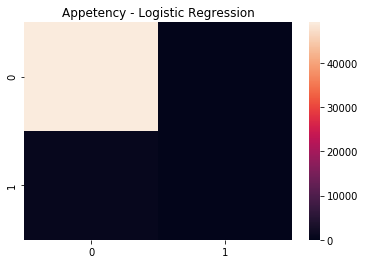

In [173]:
# Matriz de confusão
cm = confusion_matrix(y_appetency, predLRAPP)
print(cm)
sea.heatmap(cm)
plt.title('Appetency - Logistic Regression')
plt.savefig("LR_app.png")

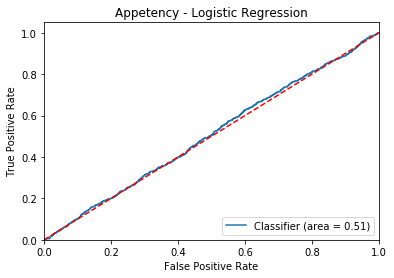

In [174]:
# Calculando os valores para o roc_auc e plotando o gráfico
auc_lr_app = roc_auc_score(y_appetency, logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_appetency, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Classifier (area = %0.2f)' % auc_lr_app)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Appetency - Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig("auc_lr_app")

##### <b> Churn

In [175]:
# Ajustando os dados - Logistic Regression
logreg.fit(X_train, y_churn)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [176]:
# Predizendo os valores 
pred = logreg.predict(X_test)

In [177]:
# Verificando a acurária do modelo
acc_lr_churn = metrics.accuracy_score(y_churn, pred)
print("Accuracy", acc_lr_churn)

Accuracy 0.92656


In [178]:
# Visualizando os resultados
print(classification_report(y_churn,pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     46328
           1       0.00      0.00      0.00      3672

   micro avg       0.93      0.93      0.93     50000
   macro avg       0.46      0.50      0.48     50000
weighted avg       0.86      0.93      0.89     50000



[[46328     0]
 [ 3672     0]]


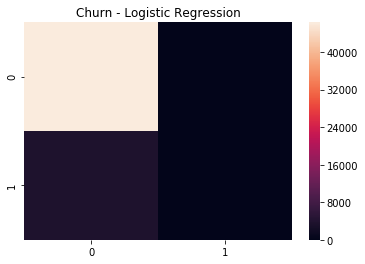

In [179]:
# Matriz de confusão
cm = confusion_matrix(y_churn, pred)
print(cm)
sea.heatmap(cm)
plt.title('Churn - Logistic Regression')
plt.savefig("LR_churn.png")

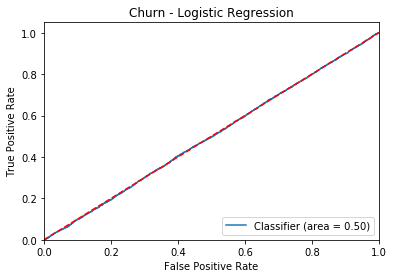

In [180]:
# Calculando os valores para o roc_auc e plotando o gráfico
auc_lr_churn = roc_auc_score(y_churn, logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_churn, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Classifier (area = %0.2f)' % auc_lr_churn)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Churn - Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig("auc_lr_churn.png")


##### <b> up_selling

In [181]:
# Ajustando os dados - Logistic Regression
logreg.fit(X_train, y_up)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [182]:
# Predizendo os valores 
pred = logreg.predict(X_test)

In [183]:
# Verificando a acurária do modelo
acc_lr_up = metrics.accuracy_score(y_up, pred)
print("Accuracy", acc_lr_up)

Accuracy 0.92628


In [184]:
# Visualizando os resultados
print(classification_report(y_up,pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     46318
           1       0.00      0.00      0.00      3682

   micro avg       0.93      0.93      0.93     50000
   macro avg       0.46      0.50      0.48     50000
weighted avg       0.86      0.93      0.89     50000



[[46314     4]
 [ 3682     0]]


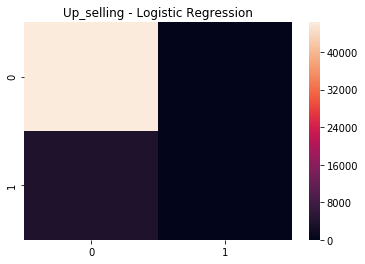

In [185]:
# Matriz de confusão
cm = confusion_matrix(y_up, pred)
print(cm)

plt.title('Up_selling - Logistic Regression')
sea.heatmap(cm)
plt.savefig("LR_up.png")

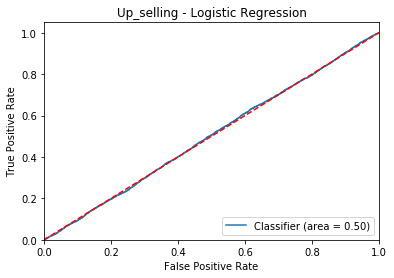

In [186]:
# Calculando os valores para o roc_auc e plotando o gráfico
auc_lr_up = roc_auc_score(y_up, logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_up, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Classifier (area = %0.2f)' % auc_lr_up)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Up_selling - Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig("auc_lr_up.png")
plt.show()


### <b> Decision Tree

##### <b> Appetency

In [187]:
# Ajustando os dados - Decision Tree
dtree.fit(X_train, y_appetency)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [188]:
# Predizendo os valores 
pred = dtree.predict(X_test)

In [189]:
# Verificando a acurária do modelo
acc_dt_appetency = metrics.accuracy_score(y_appetency, pred)
print("Accuracy", acc_dt_appetency)

Accuracy 0.9822


In [190]:
# Visualizando os resultados
print(classification_report(y_appetency,pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     49110
           1       0.00      0.00      0.00       890

   micro avg       0.98      0.98      0.98     50000
   macro avg       0.49      0.50      0.50     50000
weighted avg       0.96      0.98      0.97     50000



[[49110     0]
 [  890     0]]


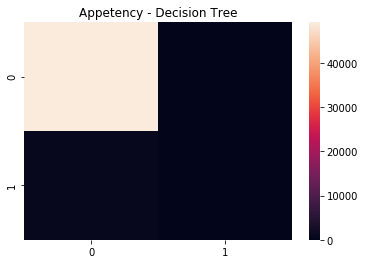

In [191]:
# Matriz de confusão
cm = confusion_matrix(y_appetency, pred)
print(cm)
sea.heatmap(cm)
plt.title('Appetency - Decision Tree')
plt.savefig("DT_app.png")

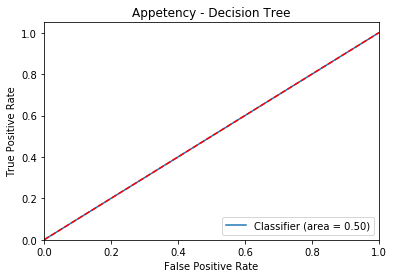

In [192]:
# Calculando os valores para o roc_auc e plotando o gráfico
auc_dt_app = roc_auc_score(y_appetency, dtree.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_appetency, dtree.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Classifier (area = %0.2f)' % auc_dt_app)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Appetency - Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig("auc_dt_app.png")
plt.show()


##### <b> Churn

In [193]:
# Ajustando os dados - Decision Tree
dtree.fit(X_train, y_churn)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [194]:
# Predizendo os valores 
pred = dtree.predict(X_test)

In [195]:
# Verificando a acurária do modelo
acc_dt_churn= metrics.accuracy_score(y_churn, pred)
print("Accuracy", acc_dt_churn)

Accuracy 0.92644


In [196]:
# Visualizando os resultados
print(classification_report(y_churn,pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     46328
           1       0.00      0.00      0.00      3672

   micro avg       0.93      0.93      0.93     50000
   macro avg       0.46      0.50      0.48     50000
weighted avg       0.86      0.93      0.89     50000



[[46322     6]
 [ 3672     0]]


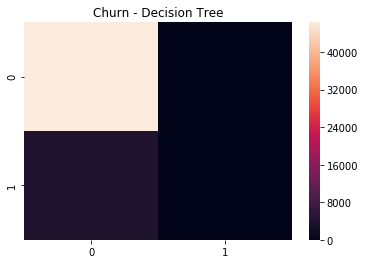

In [197]:
# Matriz de confusão
cm = confusion_matrix(y_churn, pred)
print(cm)
sea.heatmap(cm)
plt.title('Churn - Decision Tree')
plt.savefig("DT_churn.png")

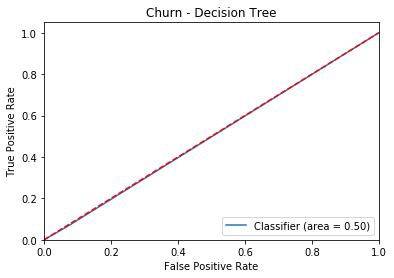

In [198]:
# Calculando os valores para o roc_auc e plotando o gráfico
auc_dt_churn = roc_auc_score(y_churn, dtree.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_churn, dtree.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Classifier (area = %0.2f)' % auc_dt_churn)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Churn - Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig("auc_dt_churn.png")
plt.show()


##### <b> Up_selling

In [199]:
# Ajustando os dados - Decision Tree
dtree.fit(X_train, y_up)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [200]:
# Predizendo os valores 
pred= dtree.predict(X_test)

In [201]:
# Verificando a acurária do modelo
acc_dt_up = metrics.accuracy_score(y_up, pred)
print("Accuracy", acc_dt_up)

Accuracy 0.88876


In [202]:
# Visualizando os resultados
print(classification_report(y_up,pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94     46318
           1       0.08      0.05      0.06      3682

   micro avg       0.89      0.89      0.89     50000
   macro avg       0.50      0.50      0.50     50000
weighted avg       0.86      0.89      0.88     50000



[[44266  2052]
 [ 3510   172]]


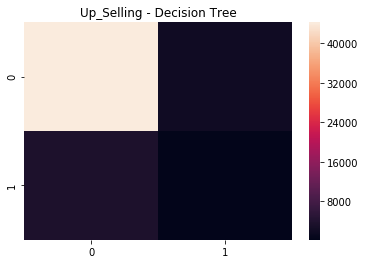

In [203]:
# Matriz de confusão
cm = confusion_matrix(y_up, pred)
print(cm)
sea.heatmap(cm)
plt.title('Up_Selling - Decision Tree')
plt.savefig("DT_up.png")

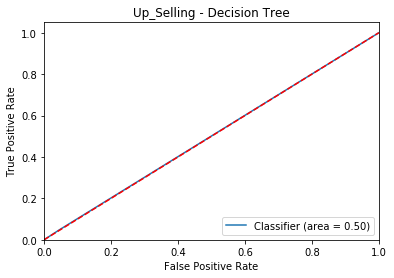

In [204]:
# Calculando os valores para o roc_auc e plotando o gráfico
auc_dt_up = roc_auc_score(y_up, dtree.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_up, dtree.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Classifier (area = %0.2f)' % auc_dt_up)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Up_Selling - Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig("auc_dt_up.png")
plt.show()

### <b> Organizando os resultados para melhor visualização

In [205]:
# Criando um dicionário para organizar os dados
dict_info = {'Appetency':[acc_dt_appetency, acc_lr_appetency], 
            'Churn': [acc_dt_churn, acc_lr_churn],
             'Up_selling': [acc_dt_up, acc_lr_up]}
dict_info

{'Appetency': [0.9822, 0.9822],
 'Churn': [0.92644, 0.92656],
 'Up_selling': [0.88876, 0.92628]}

In [206]:
# Criando um dataframe com os dados organizados em colunas
results = pd.DataFrame(dict_info, index = ['Decision Tree', 'Logistic Regression'])

In [207]:
results

,Appetency,Churn,Up_selling
Decision Tree,0.9822,0.92644,0.88876
Logistic Regression,0.9822,0.92656,0.92628


In [208]:
# Criando um dicionário para organizar os dados
dict_auc = {'Appetency':[auc_dt_app, auc_lr_app], 
            'Churn': [auc_dt_churn, auc_lr_churn],
             'Up_selling': [auc_dt_up, auc_lr_up]}
dict_auc

{'Appetency': [0.4999898187741804, 0.5068671796174148],
 'Churn': [0.49747919095591575, 0.49889639104552963],
 'Up_selling': [0.5012061600274643, 0.5011477641552146]}

In [209]:
# Criando um dataframe com os dados organizados em colunas
auc_results = pd.DataFrame(dict_auc, index = ['Decision Tree', 'Logistic Regression'])

In [210]:
auc_results

,Appetency,Churn,Up_selling
Decision Tree,0.499990,0.497479,0.501206
Logistic Regression,0.506867,0.498896,0.501148
